In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::',header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::',header=None, names=mnames, engine='python',encoding='latin-1')

## Get to know more about movies

/tmp/ipykernel_37785/2331679454.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


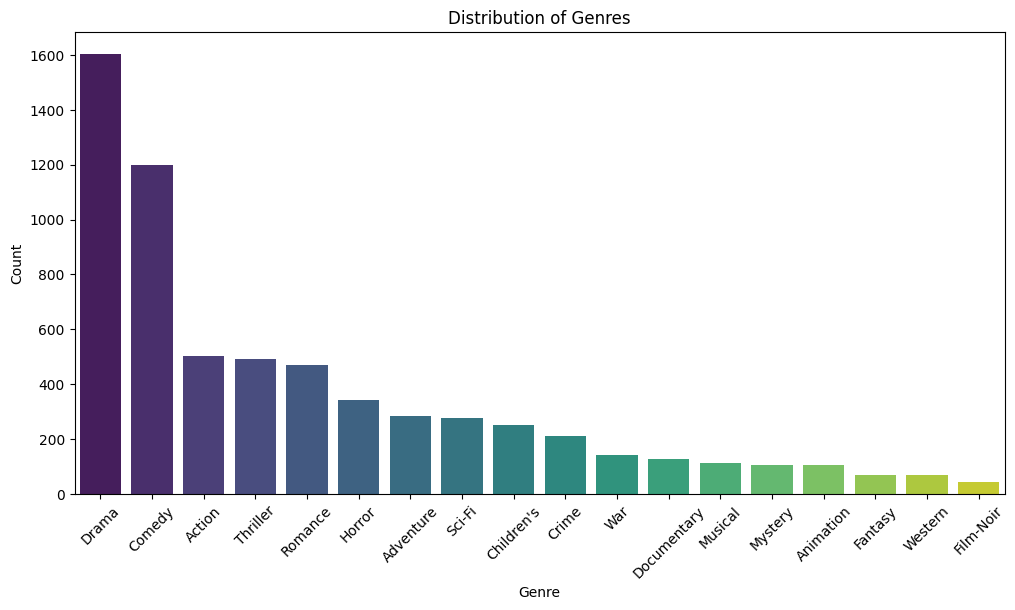

/tmp/ipykernel_37785/2331679454.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(movies['year'], bins=range(movies['year'].min(), movies['year'].max() + 1), kde=False, palette='viridis')


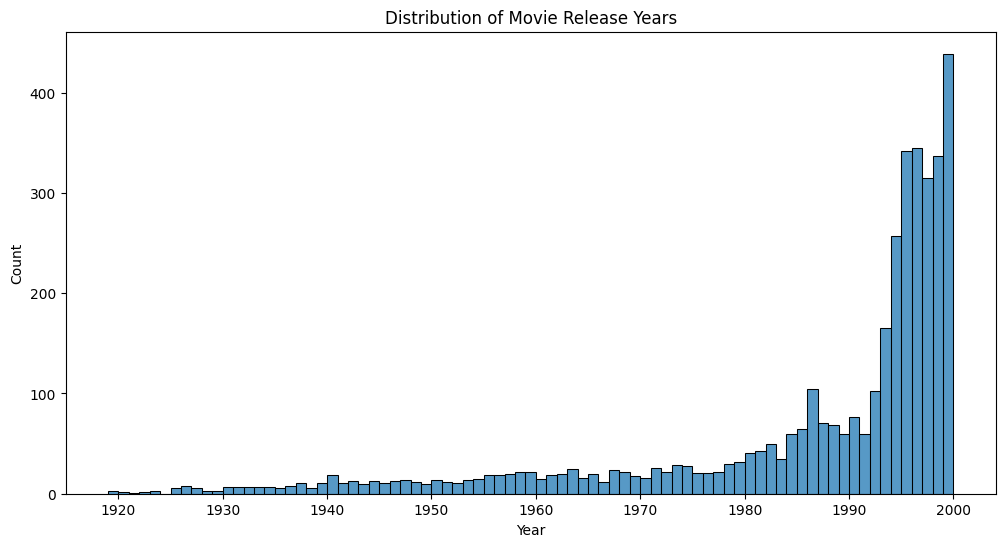

In [2]:
# Preprocess genres
genre_list = movies['genres'].str.split('|').explode()
genre_counts = genre_list.value_counts()

# Preprocess years
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(int)
year_counts = movies['year'].value_counts().sort_index()

# Plot distribution of genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of years
plt.figure(figsize=(12, 6))
sns.histplot(movies['year'], bins=range(movies['year'].min(), movies['year'].max() + 1), kde=False, palette='viridis')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_37785/3861798225.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year', y='rating', data=avg_rating_per_year, marker='o', palette='viridis')


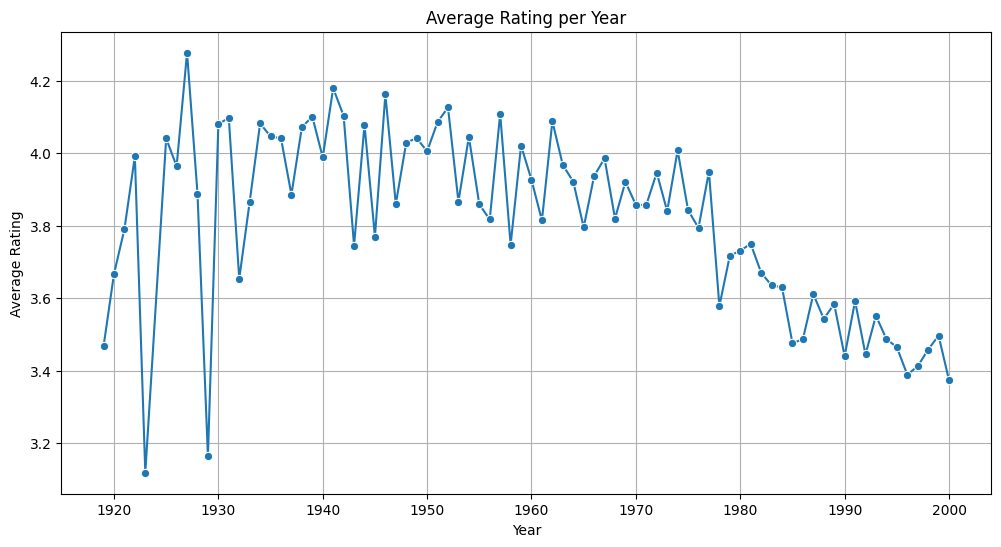

/tmp/ipykernel_37785/3861798225.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='genres', data=avg_rating_per_genre.sort_values(by='rating'), palette='viridis')


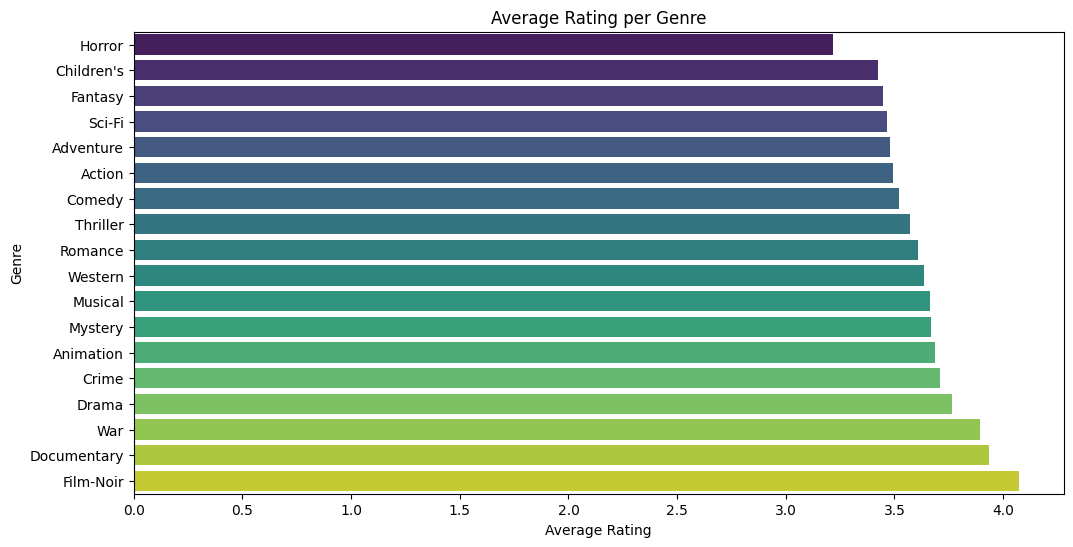

In [4]:
df_rating_movie = pd.merge(ratings,movies,how='left',on='movie_id')

# Calculate average rating per year
avg_rating_per_year = df_rating_movie.groupby('year')['rating'].mean().reset_index()

# Preprocess genres
df_genres = df_rating_movie[['rating', 'genres']].copy()
df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres = df_genres.explode('genres')

# Calculate average rating per genre
avg_rating_per_genre = df_genres.groupby('genres')['rating'].mean().reset_index()

# Plot average rating per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=avg_rating_per_year, marker='o', palette='viridis')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Plot average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genres', data=avg_rating_per_genre.sort_values(by='rating'), palette='viridis')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [10]:
# We can see that older users tend to give higher ratings
pd.merge(ratings,users,how='left',on='user_id').groupby('age')['rating'].mean()

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64